# David Kartchner
## CS 501R
## Feature Zoo 1 (Why is it a zoo?)

### Import useful Features

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
def weight_variable(shape):
  initial = tf.truncated_normal( shape, stddev=0.1 )
  return tf.Variable( initial )

def bias_variable(shape):
  initial = tf.constant( 0.1, shape=shape )
  return tf.Variable(initial)


## Note to the Grader (probably Brandon):
** I put all of my methods in this file.  Just scross down until you find them. **

## Dropout

In [5]:
#Run for each probability 'p'
probs = [.1, .25, .5, .75, 1.]
test_accuracy = []
train_accuracy = []
for p in probs:
    print "Training network with keep probability {}".format(p)
    
    # Declare computation graph
    y_ = tf.placeholder( tf.float32, shape=[None, 10], name="y_" )
    x = tf.placeholder( tf.float32, [None, 784], name="x" )
    q = tf.placeholder(tf.float32, name='q')

    W1 = weight_variable([784, 500])
    b1 = bias_variable([500])
    h11 = tf.nn.relu( tf.matmul( x, W1*q ) + b1 )
    r1 = tf.placeholder(tf.float32, shape=[None,500])
    h1 = h11*r1

    W2 = weight_variable([500, 500])
    b2 = bias_variable([500])
    h22 = tf.nn.relu( tf.matmul( h1, W2*q ) + b2 )
    r2 = tf.placeholder(tf.float32, shape=[None,500])
    h2 = h22*r2

    W3 = weight_variable([500, 1000])
    b3 = bias_variable([1000])
    h33 = tf.nn.relu( tf.matmul( h2, W3*q ) + b3 )
    r3 = tf.placeholder(tf.float32, shape=[None, 1000])
    h3 = h33*r3

    W4 = weight_variable([1000, 10])
    b4 = bias_variable([10])
    y_hat = tf.nn.softmax(tf.matmul(h3, W4) + b4)

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))
    xent_summary = tf.scalar_summary( 'xent', cross_entropy )

    correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc_summary = tf.scalar_summary( 'accuracy', accuracy )

    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

    sess = tf.Session()
    sess.run( tf.initialize_all_variables() )

    # NOTE: we're using a single, fixed batch of the first 1000 images
    mnist = input_data.read_data_sets( "MNIST_data/", one_hot=True )

    images = mnist.train.images[ 0:1000, : ]
    labels = mnist.train.labels[ 0:1000, : ]

    for i in range( 150 ):
        drop1 = np.random.binomial(1, p, size=(1000,500))
        drop2 = np.random.binomial(1, p, size=(1000,500))
        drop3 = np.random.binomial(1, p, size=(1000,1000))

        _, acc = sess.run( [ train_step, accuracy ], feed_dict={ x: images, y_: labels, r1:drop1, \
                                                                r2:drop2, r3:drop3, q:1 } )


    train1 = np.ones((1000,500))
    train2 = np.ones((1000,500))
    train3 = np.ones((1000,1000))
    train_acc = sess.run( accuracy, feed_dict={ x: images, y_: labels, r1:train1, r2:train2, r3:train3, q:p } )
    train_accuracy.append(train_acc)
    
    test1 = np.ones((10000,500))
    test2 = np.ones((10000,500))
    test3 = np.ones((10000,1000))
    test_acc = sess.run( accuracy, feed_dict={ x: mnist.test.images, y_: mnist.test.labels, r1:test1, r2:test2, \
                                              r3:test3, q:p } )
    print( "test accuracy %g" % test_acc )
    test_accuracy.append(test_acc)
    


Training network with keep probability 0.1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
test accuracy 0.098
Training network with keep probability 0.25
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
test accuracy 0.4857
Training network with keep probability 0.5
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
test accuracy 0.8049
Training network with keep probability 0.75
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-id

### Print Graph of Accuracy

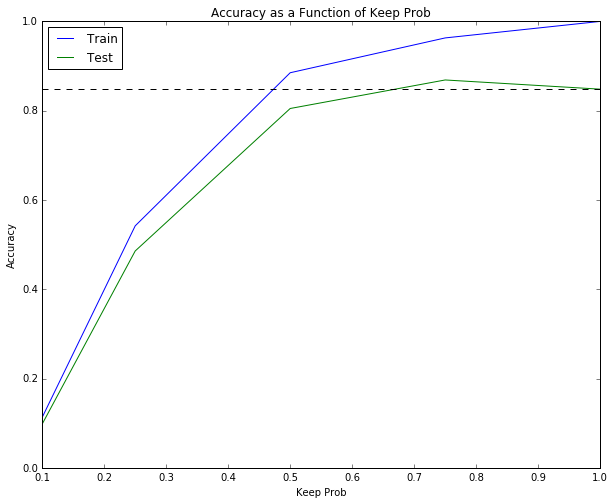

In [6]:
plt.figure(figsize=(10,8))
plt.plot(probs, train_accuracy, label="Train")
plt.plot(probs, test_accuracy, label="Test")
plt.plot([.1,1],[test_accuracy[-1],test_accuracy[-1]], '--k')
plt.xlabel("Keep Prob")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Accuracy as a Function of Keep Prob")
plt.show()

## DropConnect

In [15]:
#Run for each probability 'p'
probs = [.1, .25, .5, .75, 1.]
test_accuracy = []
train_accuracy = []
for p in probs:
    print "Training network with keep probability {}".format(p)
    
    # Declare computation graph
    y_ = tf.placeholder( tf.float32, shape=[None, 10], name="y_" )
    x = tf.placeholder( tf.float32, [None, 784], name="x" )
    q = tf.placeholder(tf.float32, name='q')

    W1 = weight_variable([784, 500])
    b1 = bias_variable([500])
    r1 = tf.placeholder(tf.float32, shape=[784, 500])
    h1 = tf.nn.relu( tf.matmul( x, r1*W1*q ) + b1 )

    W2 = weight_variable([500, 500])
    b2 = bias_variable([500])
    r2 = tf.placeholder(tf.float32, shape=[500, 500])
    h2 = tf.nn.relu( tf.matmul( h1, r2*W2*q ) + b2 )

    W3 = weight_variable([500, 1000])
    b3 = bias_variable([1000])
    r3 = tf.placeholder(tf.float32, shape=[500, 1000])
    h3 = tf.nn.relu( tf.matmul( h2, r3*W3*q ) + b3 )


    W4 = weight_variable([1000, 10])
    b4 = bias_variable([10])
    y_hat = tf.nn.softmax(tf.matmul(h3, W4) + b4)

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1]))
    xent_summary = tf.scalar_summary( 'xent', cross_entropy )

    correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc_summary = tf.scalar_summary( 'accuracy', accuracy )

    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

    sess = tf.Session()
    sess.run( tf.initialize_all_variables() )

    # NOTE: we're using a single, fixed batch of the first 1000 images
    mnist = input_data.read_data_sets( "MNIST_data/", one_hot=True )

    images = mnist.train.images[ 0:1000, : ]
    labels = mnist.train.labels[ 0:1000, : ]
    
    for i in range( 1000 ):
        drop1 = np.random.binomial(1, p, size=(784,500))
        drop2 = np.random.binomial(1, p, size=(500,500))
        drop3 = np.random.binomial(1, p, size=(500,1000))

        _, acc = sess.run( [ train_step, accuracy ], feed_dict={ x: images, y_: labels, r1:drop1, \
                                                                r2:drop2, r3:drop3, q:1 } )
        if i%50==0:
            print( "step %d, training accuracy %g" % (i, acc) )

    train1 = np.ones((784,500))
    train2 = np.ones((500,500))
    train3 = np.ones((500,1000))
    train_acc = sess.run( accuracy, feed_dict={ x: images, y_: labels, r1:train1, r2:train2, r3:train3, q:p } )
    train_accuracy.append(train_acc)
    
    
    test_acc = sess.run( accuracy, feed_dict={ x: mnist.test.images, y_: mnist.test.labels, r1:train1, \
                                              r2:train2, r3:train3, q:p } )
    print( "test accuracy %g" % test_acc )
    test_accuracy.append(test_acc)
    

Training network with keep probability 0.1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.108
step 50, training accuracy 0.128
step 100, training accuracy 0.065
step 150, training accuracy 0.079
step 200, training accuracy 0.063
step 250, training accuracy 0.098
step 300, training accuracy 0.129
step 350, training accuracy 0.111
step 400, training accuracy 0.105
step 450, training accuracy 0.144
step 500, training accuracy 0.107
step 550, training accuracy 0.08
step 600, training accuracy 0.122
step 650, training accuracy 0.134
step 700, training accuracy 0.118
step 750, training accuracy 0.109
step 800, training accuracy 0.166
step 850, training accuracy 0.201
step 900, training accuracy 0.127
step 950, training accuracy 0.125
test accuracy 0.115
Training network with keep probability 0.25
Extracting MNIST_data/t

### Print Graph of Accuracy

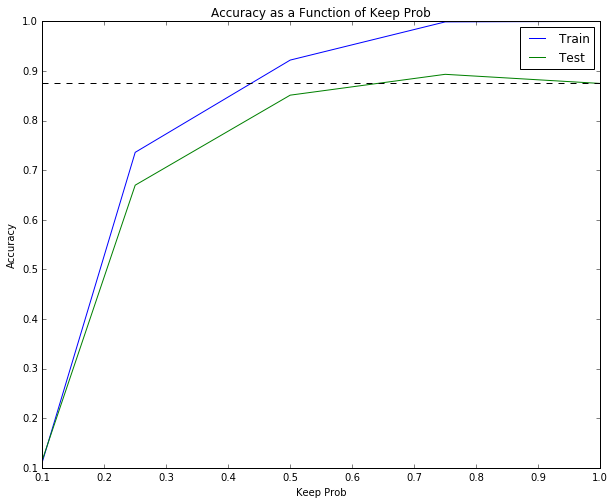

In [16]:
plt.figure(figsize=(10,8))
plt.plot(probs, train_accuracy, label="Train")
plt.plot(probs, test_accuracy, label="Test")
plt.plot([.1,1],[test_accuracy[-1],test_accuracy[-1]], '--k')
plt.xlabel("Keep Prob")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Accuracy as a Function of Keep Prob")
plt.show()

## L1 Regularization

In [10]:
#Run for each probability 'p'
lamdas = [.1, .01, .001, 0]
test_accuracy = []
train_accuracy = []
for lamda in lamdas:
    
    print "Training for lambda = {}".format(lamda)
    
    # Declare computation graph
    y_ = tf.placeholder( tf.float32, shape=[None, 10], name="y_" )
    x = tf.placeholder( tf.float32, [None, 784], name="x" )
    lam = tf.placeholder(tf.float32, name='lambda')

    W1 = weight_variable([784, 500])
    b1 = bias_variable([500])
    h1 = tf.nn.relu( tf.matmul( x, W1 ) + b1 )

    W2 = weight_variable([500, 500])
    b2 = bias_variable([500])
    h2 = tf.nn.relu( tf.matmul( h1, W2 ) + b2 )

    W3 = weight_variable([500, 1000])
    b3 = bias_variable([1000])
    h3 = tf.nn.relu( tf.matmul( h2, W3 ) + b3 )


    W4 = weight_variable([1000, 10])
    b4 = bias_variable([10])
    y_hat = tf.nn.softmax(tf.matmul(h3, W4) + b4)

    cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_hat), reduction_indices=[1])) +\
                                lam*(tf.reduce_sum(tf.abs(W1))+tf.reduce_sum(tf.abs(W2))+\
                                     tf.reduce_sum(tf.abs(W3)) + tf.reduce_sum(tf.abs(W4)))
    xent_summary = tf.scalar_summary( 'xent', cross_entropy )

    correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acc_summary = tf.scalar_summary( 'accuracy', accuracy )

    train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

    sess = tf.Session()
    sess.run( tf.initialize_all_variables() )

    # NOTE: we're using a single, fixed batch of the first 1000 images
    mnist = input_data.read_data_sets( "MNIST_data/", one_hot=True )

    images = mnist.train.images[ 0:1000, : ]
    labels = mnist.train.labels[ 0:1000, : ]

    for i in range( 150 ):
        _, acc = sess.run( [ train_step, accuracy ], feed_dict={ x: images, y_: labels, lam:lamda } )
        if i%10==0:
            print( "step %d, training accuracy %g" % (i, acc) )

    train_acc = sess.run( accuracy, feed_dict={ x: images, y_: labels } )
    train_accuracy.append(train_acc)
    
    test_acc = sess.run( accuracy, feed_dict={ x: mnist.test.images, y_: mnist.test.labels } )
    print( "test accuracy %g" % test_acc)
    test_accuracy.append(test_acc)
    

Training for lambda = 0.1
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.088
step 10, training accuracy 0.087
step 20, training accuracy 0.097
step 30, training accuracy 0.101
step 40, training accuracy 0.105
step 50, training accuracy 0.112
step 60, training accuracy 0.113
step 70, training accuracy 0.114
step 80, training accuracy 0.119
step 90, training accuracy 0.118
step 100, training accuracy 0.121
step 110, training accuracy 0.119
step 120, training accuracy 0.118
step 130, training accuracy 0.118
step 140, training accuracy 0.118
test accuracy 0.1152
Training for lambda = 0.01
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
step 0, training accuracy 0.103
step 10

### Print Graph of Accuracy

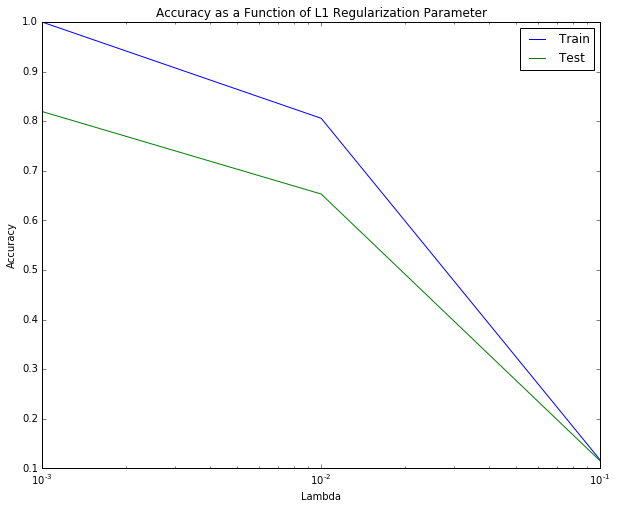

In [14]:
plt.figure(figsize=(10,8))
plt.semilogx(lamdas, train_accuracy, label="Train")
plt.semilogx(lamdas, test_accuracy, label="Test")
plt.semilogx([0,.1],[test_accuracy[-1],test_accuracy[-1]], '--k')
plt.xlabel("Lambda")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.title("Accuracy as a Function of L1 Regularization Parameter")
plt.show()